## JSON Mini Project 
This JSON Mini Project is being completed for sub-unit 5.3 in order to become more familiar with python packages for dealing with JSON and to study examples with JSON strings and files.

In [145]:
#import packages
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [149]:
#read in json file and examine a sample of the data using .head()
file = 'world_bank_projects.json'
df = pd.read_json(file)
#examine the dataframe
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


## Question 1: Identify the Top 10 Countries with Most Projects
In order to find the top 10 countries, the countryname column can be sorted by value_counts. This examination of the top 10 countries looks good - until you realize that Africa is listed as a country.  

In [150]:
df['countryname'].value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

By counting the frequency of country names, we see that the top 10 countries are: China, Indonesia, Vietnam, India, Yemen, Bangladesh, Nepal, Morocco, Africa and Mozambique.
The 9th country on this list is misleading, as Africa is a continent, not a country. Africa is listed in 10th place with 11 projects total. In order to remedy this, I filtered out any country name that had a continent listed, and reran the same code to determine the top 10 countries.

In [152]:
#create list of continent names
continents = ['Africa',
             'Antartica',
              'Asia',
              'Australia',
              'Europe',
              'North America',
              'South America']
#filter out true country names
filtered = df.countryname[np.logical_not(df['countryname'].isin(continents))]
filtered.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Federative Republic of Brazil       9
Name: countryname, dtype: int64

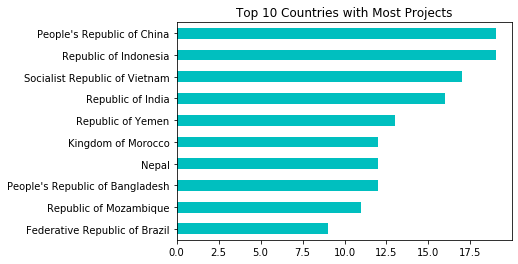

In [182]:
#visualize question 1
filtered.value_counts()[:10].sort_values().plot(kind='barh', title='Top 10 Countries with Most Projects', color='c')

Great! Now this breakdown shows us the true top 10 countries!

## Question Two & Question 3: Find the Top 10 Major Project Themes, Fill in Missing Values
In order to find the top 10 major project themes, several steps need to be taken to ensure accuracy of this list. This process begins with using json_normalize to flatten mjtheme_namecode, and examining a sample of the dataframe. 

In [160]:
#load json file
with open ('world_bank_projects.json') as data_file:
    data = json.load(data_file)
#normalize mjtheme_namecode column in order to flatten json object
df = json_normalize(data,'mjtheme_namecode', ['id'])
#examine the normalized data
df.head(20)

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310
5,2,Public sector governance,P145310
6,11,Environment and natural resources management,P145310
7,6,Social protection and risk management,P145310
8,7,Social dev/gender/inclusion,P144665
9,7,Social dev/gender/inclusion,P144665


While examining the first 20 rows of the normalized mjtheme_namecode data, I determined that some project theme names are missing, however their codes and project ID's are still available. In order to fill in the missing values, I first replacein all of the missing values with NaN, then fill the NaN values using fillna and bfill - which fills NaN with a value in the forward index.

In [169]:
#fill all nulls with NaN, then backfill the data
df[df.name == ''] = np.nan
df = df.fillna(method = 'bfill')
df.head(20)

,code,name,id
0,8,Human development,P129828
1,1,Economic management,P144674
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310
5,2,Public sector governance,P145310
6,11,Environment and natural resources management,P145310
7,6,Social protection and risk management,P145310
8,7,Social dev/gender/inclusion,P144665
9,7,Social dev/gender/inclusion,P144665


Now all of our missing values are filled in, yay! Now the top 10 project themes can be calculated.

In [170]:
#evaluate top ten project theme's using the mjtheme_namecode column
df.name.value_counts().head(10)

Environment and natural resources management    250
Human development                               218
Rural development                               215
Public sector governance                        198
Social protection and risk management           177
Financial and private sector development        142
Social dev/gender/inclusion                     126
Trade and integration                            78
Urban development                                49
Economic management                              34
Name: name, dtype: int64

Here we have our top 10 project themes!
While examining the first 20 rows of the data, I also noticed that there are duplicate project themes for the same project ID. Some projects have multiple themes, which require separate codes, and that should be counted in the overall total. For example, P144933 has two themes listed - code 5: Trade and Integration, and code 4: Financial and private sector development. 
However, some projects list the same code twice, creating duplicate project themes that need to be removed. In order to accurately account for our top 10 project themes, these duplicate values need to be removed.

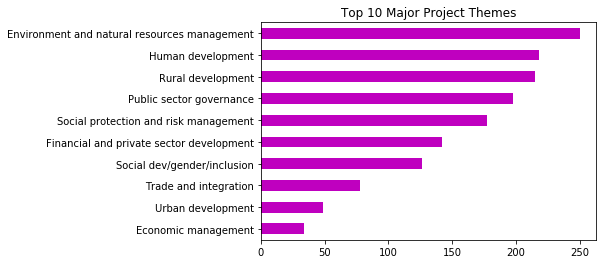

In [183]:
#visualize question 2
df.name.value_counts()[:10].sort_values().plot(kind='barh', title='Top 10 Major Project Themes', color = 'm')